# Exploratory Data Analysis for Predicting Leasing Approvals 


## Business Understanding




### Context

A Canadian-based equipment leasing company (hereafter referred to as "the Client") specializes in purchasing and leasing equipment to various businesses across Canada. The Client collaborates with a network of funders who provide the capital necessary for each lease agreement. Companies seeking to lease equipment submit applications to the Client, who then works to get these applications approved by their funders.

Successful approvals are crucial for the Client's business growth and reputation among funders. Funders often limit the number of deals they process at a time due to risk management concerns. However, they are more inclined to increase this limit when they observe that a broker consistently submits applications that are approved and lead to successful leases. Each approved application that defaults not only results in financial loss but also represents a significant opportunity cost, affecting the Client's credibility with funders.

Currently, the Client invests considerable time and resources into due diligence, including extensive back-and-forth communications and on-site business visits. While this thorough process helps in securing approvals, it is not scalable without proportionally increasing headcount—a challenge the Client aims to overcome. With the recent migration from a paper-based system to a digital application portal (Phase 1 of their digital transformation), the Client has experienced an influx of applications. They now receive hundreds of requests weekly and need an efficient way to prioritize these applications to maximize successful approvals.

Leveraging artificial intelligence presents a new opportunity (Phase 2 of their transformation) to help the Client scale their operations without significantly increasing personnel by predicting the likelihood of application approvals and focusing efforts on the most promising candidates.

### Problem Statement

The Client seeks to enhance their leasing approval process by predicting the likelihood of application approvals based on available data. This predictive capability will enable them to:
Increase the number of successful applications submitted to funders.
Prioritize organizations with a higher chance of approval.
Scale their operations efficiently without a significant increase in headcount.

### Project Overview

This project aims to develop a predictive model that assesses the likelihood of lease application approvals. By analyzing historical application data and identifying key factors that influence funder decisions, the Client can optimize their application submission strategy. The model will help in:
- Streamlining the due diligence process by focusing on high-probability approvals.
- Enhancing relationships with funders by consistently submitting quality applications.
- Allocating resources effectively to handle the most promising leads.

### Research Question

How can we predict the likelihood of lease application approvals for Canadian companies looking to lease equipment and software in a way that minimizes poor leads without missing opportunities?

An addtional Research Question is, Do external factors such as interest rates have an impact on the approval of lease applications?

### Data Task

The task is to develop a predictive model, such as logistic regression or decision trees, to classify applications into approved or denied categories. Success will be evaluated using performance metrics like accuracy, precision, recall, and F1 Score to ensure the model meets the business objective of improving approval rates.

### Expected Results

- High-Performance Predictive Model(F1 Score): By leveraging advanced data analysis techniques, we aim to develop a model that achieves an optimal balance between accuracy and completeness. This will enable us to make more precise and informed business decisions.
- Identification of Key Predictors: Through statistical analysis and model interpretability techniques, we expect to identify the most significant factors influencing approval decisions, such as company size, industry sector, lease amount, years in operation, and interest rates.
- Enhanced Decision-Making: The insights gained will inform strategic decisions, streamline the due diligence process, and improve resource allocation by focusing on applications with the highest potential.
- Improved Approval Rates: By minimizing poor leads and not missing viable opportunities, the company can increase its overall approval rates and strengthen relationships with funders.

### Why this question is important?

Efficiently processing lease applications is crucial for the company's growth and sustainability in a competitive market. With the recent influx of applications due to the new digital portal, the company faces the challenge of prioritizing which applications to focus on without overwhelming their resources or increasing headcount.
By answering this question, the company stands to gain significant benefits:
- Resource Optimization: Predicting approval likelihood allows the company to allocate time and effort toward applications that are more likely to be approved, reducing wasted resources on low-probability cases.
- Operational Scalability: Implementing a predictive model enables the company to handle a higher volume of applications efficiently, supporting business growth without the need for proportional staff increases.
- Enhanced Funder Relationships: Consistently presenting high-quality applications improves the company's reputation with funders, which may lead to increased funding limits and better terms, directly impacting profitability.
- Strategic Decision-Making: Understanding the key factors that influence approvals empowers the company to guide applicants on improving their profiles, potentially increasing overall approval rates.
- Competitive Advantage: Leveraging data analytics and predictive modeling positions the company ahead of competitors who may not utilize such advanced techniques, attracting more business and fostering customer trust.










## Data Understanding



### Data Collection 

We need to gather all the relevant datasets for the project. 
- Lease application data from the client’s database (which includes company size, industry sector, lease amount, years in operation, etc.) It is stored in a csv file called `funding_results.csv`.

- External economic data, such as interest rates from the Bank of Canada. It is stored in a csv file called `rates.csv`.



In [1]:
#Auto reload is used to ensure changes made to utils show up immediatly
%load_ext autoreload
%autoreload 2

import pandas as pd

#Load the data
funding_results = pd.read_csv('data/funding_results.csv', parse_dates=['Application Date'])
rates = pd.read_csv('data/rates.csv', parse_dates=['Date'])


### Data Description 
In this step, we describe the available datasets, identifying each variable (e.g., company size, lease amount, approval status, etc.) and its type (categorical, numerical, etc.). This helps us understand how these variables might relate to the problem.



In [2]:
#Describe the funding_results dataframe
funding_results.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Funder ID               7102 non-null   int64         
 1   Status                  7102 non-null   object        
 2   Company Location        7102 non-null   object        
 3   Company Size            7102 non-null   object        
 4   Annual Revenue          7102 non-null   int64         
 5   Year Incorporated       7102 non-null   int64         
 6   Industry Sector         7102 non-null   object        
 7   Lease Term              7102 non-null   int64         
 8   Lease Amount            7102 non-null   float64       
 9   Equipment Type          5329 non-null   object        
 10  Business Type           7102 non-null   object        
 11  Previous Lease History  7102 non-null   object        
 12  Application Date        7102 non-null   datetime

In [3]:
# Display the first few rows of the funding_results dataframe
print("Funding Results Data:")
funding_results.head()

Funding Results Data:


,Funder ID,Status,Company Location,Company Size,Annual Revenue,Year Incorporated,Industry Sector,Lease Term,Lease Amount,Equipment Type,Business Type,Previous Lease History,Application Date
0,1,approved,NB,51-100,5528010,1992,Industrial & Material Handling,5,28173.881010,NaN,Corporation,No,2020-09-04
1,3,approved,NB,51-100,5528010,1992,Industrial & Material Handling,5,28173.881010,NaN,Corporation,No,2020-09-04
2,4,approved,NB,51-100,5528010,1992,Industrial & Material Handling,5,28173.881010,NaN,Corporation,No,2020-09-04
3,1,approved,NB,51-100,8407005,1994,Industrial & Material Handling,1,161304.880881,Manufacturing Tools,Corporation,No,2020-02-14
4,3,approved,NB,51-100,8407005,1994,Industrial & Material Handling,1,161304.880881,Manufacturing Tools,Corporation,No,2020-02-14


In [4]:
#Describe the rates dataframe
rates.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610 entries, 0 to 2609
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2610 non-null   datetime64[ns]
 1   Rate    2610 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 40.9+ KB


In [5]:


# Display the first few rows of the rates dataframe
print("\nRates Data:")
rates.head()



Rates Data:


,Date,Rate
0,2024-09-19,4.50
1,2024-09-18,4.50
2,2024-09-17,4.50
3,2024-09-16,4.50
4,2024-09-13,4.50


### Data Dictionary

#### Funding Results Data Dictionary
| **Column Name**            | **Data Type** | **Description**                                                                                     |
|----------------------------|---------------|-----------------------------------------------------------------------------------------------------|
| **Funder ID**               | Integer       | Unique identifier for the funder associated with each lease application.                             |
| **Status**                  | Categorical   | The current status of the lease application (e.g., Approved, Denied, Pending).                       |
| **Company Location**        | Categorical   | The geographic location of the company applying for the lease, such as province or region.           |
| **Company Size**            | Categorical   | A categorical descriptor of the size of the company, likely based on number of employees or scale.    |
| **Annual Revenue**          | Integer       | The annual revenue of the company in monetary units.                                                  |
| **Year Incorporated**       | Integer       | The year in which the company was incorporated or legally established.                               |
| **Industry Sector**         | Categorical   | The industry in which the company operates (e.g., Manufacturing, Retail).                            |
| **Lease Term**              | Integer       | The length of the lease agreement in months or years.                                                |
| **Lease Amount**            | Float         | The total monetary value of the lease request.                                                       |
| **Equipment Type**          | Categorical   | The type of equipment being leased (e.g., Machinery, Electronics).                                   |
| **Business Type**           | Categorical   | The legal structure of the business (e.g., Corporation, Partnership, Sole Proprietorship).            |
| **Previous Lease History**  | Categorical   | Indicates whether the company has previously leased equipment from the client (Yes/No).               |
| **Application Date**        | Date          | The date the application was submitted.                                                              |





#### Rates Data Dictionary
| **Column Name** | **Data Type** | **Description**                                                            |
|-----------------|---------------|----------------------------------------------------------------------------|
| **Date**        | Date          | The date on which the interest rate was recorded.                           |
| **Rate**        | Float         | The interest rate for the corresponding date, typically measured in percent.|


In [6]:
#Importing the necessary libraries for the exploratory data analysis
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [7]:
unique_values = funding_results['Company Size'].unique()
print(unique_values)

['51-100' '100+' '1-50']


### Exploratory Data Analysis | Lease Application Data

In [8]:

# Generate descriptive statistics for numerical columns
funding_results.describe()   

,Funder ID,Annual Revenue,Year Incorporated,Lease Term,Lease Amount,Application Date
count,7102.000000,7.102000e+03,7102.000000,7102.000000,7102.000000,7102
mean,2.475077,5.622889e+06,2004.492256,2.994649,124951.437537,2019-11-07 18:23:25.125316864
min,1.000000,1.002256e+06,1956.000000,1.000000,1000.000000,2015-01-02 00:00:00
25%,1.000000,2.380730e+06,1997.000000,2.000000,91207.092861,2017-04-07 00:00:00
50%,3.000000,3.684705e+06,2005.500000,3.000000,124546.112689,2019-07-02 00:00:00
75%,3.000000,4.907791e+06,2013.000000,4.000000,159515.695033,2022-08-26 00:00:00
max,4.000000,4.983192e+07,2022.000000,5.000000,250000.000000,2024-09-19 00:00:00
std,1.145215,7.465389e+06,11.879358,1.433195,49624.431836,NaN


In [9]:

# Generate summary statistics for categorical columns
funding_results.describe(include='object')




,Status,Company Location,Company Size,Industry Sector,Equipment Type,Business Type,Previous Lease History
count,7102,7102,7102,7102,5329,7102,7102
unique,2,3,3,5,17,1,2
top,approved,NS,1-50,Service Industry,Other,Corporation,No
freq,6510,3236,4747,1771,622,7102,3924


In [10]:
# Check for missing values in the dataset
from utils.data_understanding_helpers import analyze_missing_values
analyze_missing_values(funding_results)


Missing Values Analysis:
+------------------------+------------+------------+
| Feature                |   #Missing | %Missing   |
+========================+============+============+
| Funder ID              |          0 | 0.00%      |
+------------------------+------------+------------+
| Status                 |          0 | 0.00%      |
+------------------------+------------+------------+
| Company Location       |          0 | 0.00%      |
+------------------------+------------+------------+
| Company Size           |          0 | 0.00%      |
+------------------------+------------+------------+
| Annual Revenue         |          0 | 0.00%      |
+------------------------+------------+------------+
| Year Incorporated      |          0 | 0.00%      |
+------------------------+------------+------------+
| Industry Sector        |          0 | 0.00%      |
+------------------------+------------+------------+
| Lease Term             |          0 | 0.00%      |
+-------------------

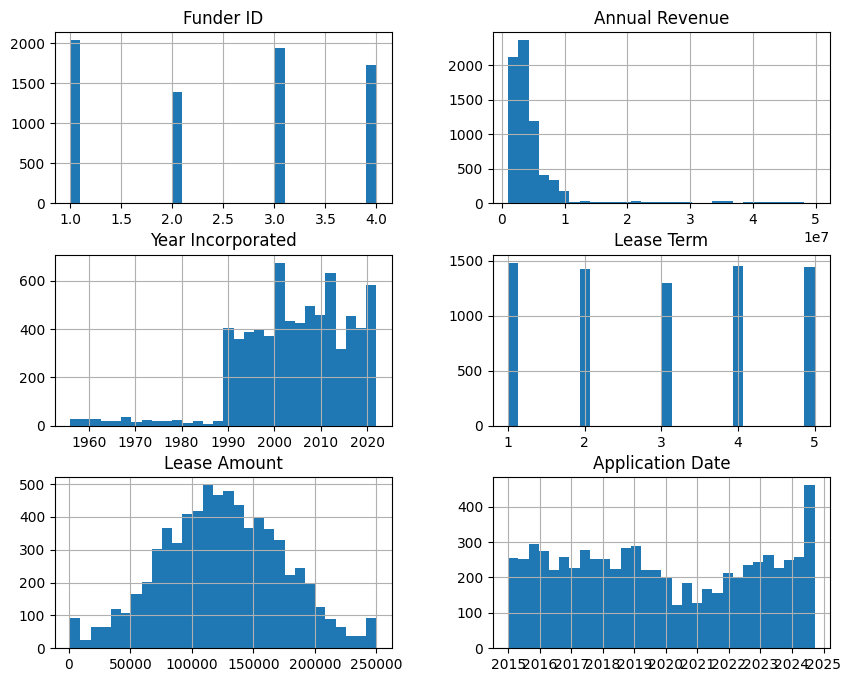

In [11]:
# Plot histograms for numerical columns
funding_results.hist(bins=30, figsize=(10, 8))
plt.show()

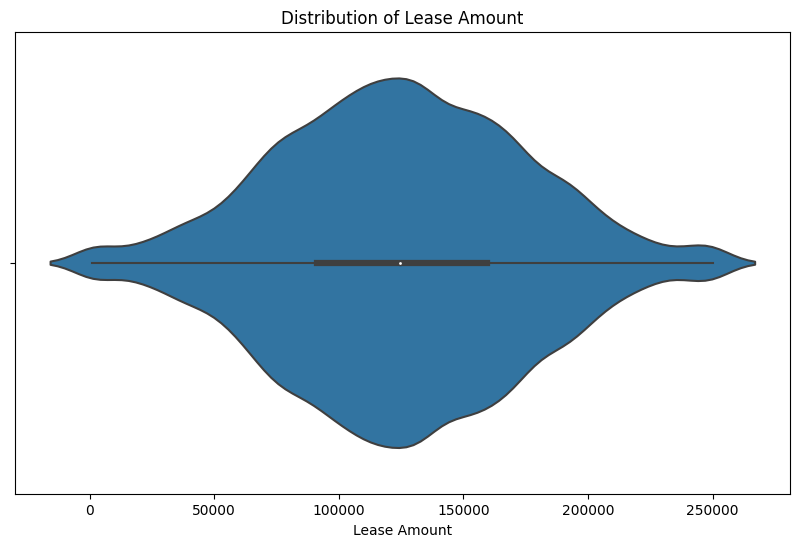

In [12]:
# Plot boxplots to detect outliers in Lease Amount
plt.figure(figsize=(10, 6))

# Create a violin plot for the 'Lease Amount' column
sns.violinplot(x=funding_results['Lease Amount'])

# Add labels and title
plt.xlabel('Lease Amount')
plt.title('Distribution of Lease Amount')

# Show the plot
plt.show()

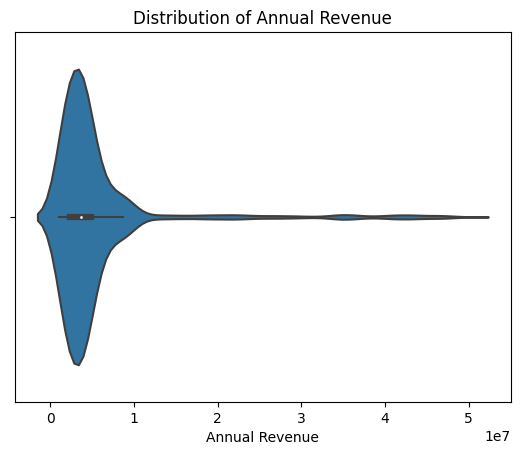

In [13]:
# Create a violin plot for the 'Annual Revenue' column
sns.violinplot(x=funding_results['Annual Revenue'])

# Add labels and title
plt.xlabel('Annual Revenue')
plt.title('Distribution of Annual Revenue')

# Show the plot
plt.show()

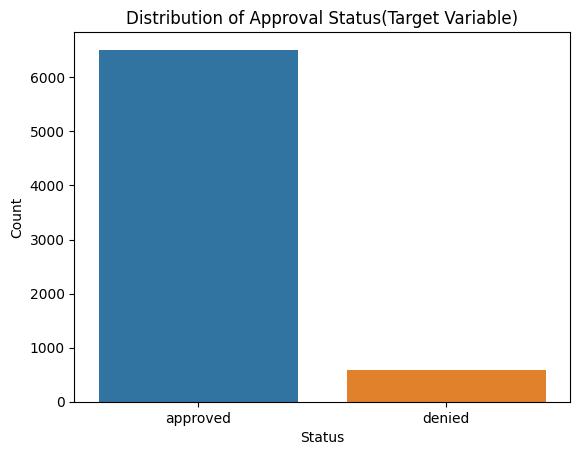

In [14]:
#Plot a bar chart for the 'Status' column
sns.countplot(x='Status', data=funding_results)
plt.xlabel('Status')
plt.ylabel('Count')
plt.title('Distribution of Approval Status(Target Variable)')
plt.show()

#### Summary of Findings
The data analysis revealed several key insights:
- The 'Lease Amount' column appears to be normally distributed, with a median of 100,000 and a mean of $124,951.
- The 'Annual Revenue' column also has a few outliers, The majority of the companies have relatively low annual revenues, but there are some outliers with significantly higher revenues, which results in a skewed distribution.This insight is important because it indicates that revenue may not be evenly distributed across companies, and outliers could heavily influence statistical analyses like averages.
- The 'Year Incorporated' column has a few outliers, with some companies reporting incorporation dates in the early 1960s.
- The 'Lease Term' column appears to be evenly distributed, with most leases ranging from 1 to 5 years.
- Data Quality Issues: Missing values in Equimpent Type, Buiness Type are all Corporations which does not aid in analysis
- The target variable is imbalanced, with less denied applications than approved applications.





### Exploratory Data Analysis | Rates Data

In [15]:
# Describe the rates dataframe
rates.describe()

,Date
count,2610
mean,2019-09-20 02:24:00
min,2014-09-19 00:00:00
25%,2017-03-21 06:00:00
50%,2019-09-19 12:00:00
75%,2022-03-21 18:00:00
max,2024-09-19 00:00:00


In [16]:
# Generate summary statistics for categorical columns
rates.describe(include='object')

,Rate
count,2610
unique,15
top,0.75
freq,550


In [17]:
# Check for missing values in the dataset
analyze_missing_values(rates)


Missing Values Analysis:
+-----------+------------+------------+
| Feature   |   #Missing | %Missing   |
+===========+============+============+
| Date      |          0 | 0.00%      |
+-----------+------------+------------+
| Rate      |          0 | 0.00%      |
+-----------+------------+------------+


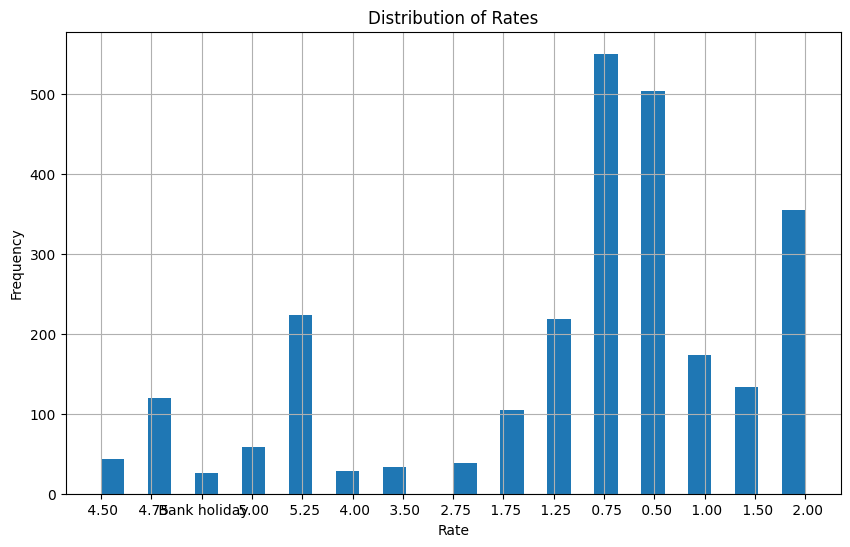

In [18]:

# Plot histograms for numerical columns
# Plot a histogram of the 'Rate' column
rates['Rate'].hist(bins=30, figsize=(10, 6))
plt.xlabel('Rate')
plt.ylabel('Frequency')
plt.title('Distribution of Rates')
plt.show()

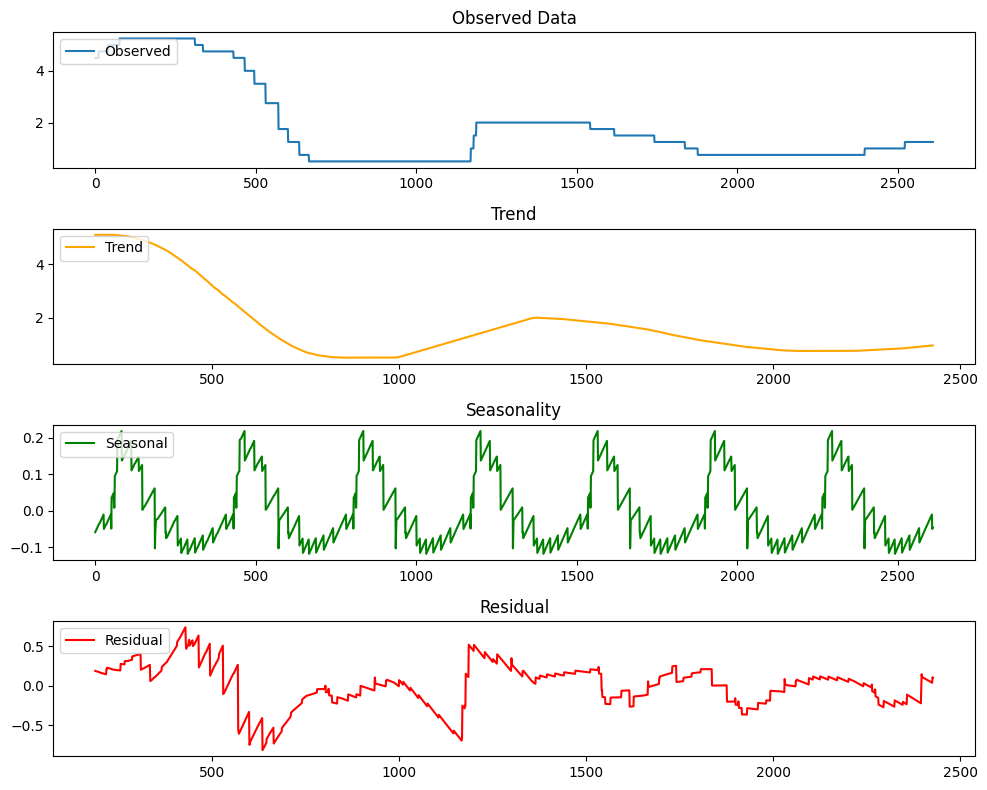

In [19]:


# Ensure 'Rate' is numeric coercing invalid values to NaN
rates['Rate'] = pd.to_numeric(rates['Rate'], errors='coerce')

# Drop rows with NaN values in the 'Rate' column
rates = rates.dropna(subset=['Rate'])

# Perform seasonal decomposition using an additive model (assuming daily frequency)
# You can adjust 'model' to 'multiplicative' if the trend or seasonality is not constant
result = seasonal_decompose(rates['Rate'], model='additive', period=365)

# Plot the decomposed components
plt.figure(figsize=(10, 8))

# Observed
plt.subplot(411)
plt.plot(result.observed, label='Observed')
plt.title('Observed Data')
plt.legend(loc='upper left')

# Trend
plt.subplot(412)
plt.plot(result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend(loc='upper left')

# Seasonal
plt.subplot(413)
plt.plot(result.seasonal, label='Seasonal', color='green')
plt.title('Seasonality')
plt.legend(loc='upper left')

# Residual
plt.subplot(414)
plt.plot(result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

#### Summary of Findings

The data analysis revealed several key insights:
- Observed Data: The interest rates show clear fluctuations over time. There are periods where the rates remain stable, followed by a noticeable decline, then a gradual rise.
- Trend: The overall trend suggests a general decline in rates over the middle section of the observed period, followed by a slight increase toward the end.
- Seasonality: The rates exhibit clear seasonality, with repeating patterns indicating that rates fluctuate in a predictable manner throughout the year.
- Residuals: The residual plot reveals some irregular fluctuations, indicating that there are variations in the data that are not explained by the trend or seasonality. This might suggest the presence of external factors affecting the rates that are not captured in the decomposition.
- Clusters in Rate Distribution: The rates are clustered around specific values (e.g., 0.75%, 0.50%, 2.00%), which could represent key interest rate levels set by central banks or other regulatory bodies. The spikes in the histogram could also point to economic interventions or rate adjustments.
- Data Quality Issues: The presence of unusual labels like "Bank Holiday" in the rate distribution suggests there may be data entry inconsistencies that need to be addressed for further analysis.

### Exploratory Data Analysis | Merged Data

In [20]:
# Merge the datasets on the 'Application Date' and 'Date' columns
# We're using a left join to ensure we keep all the funding data even if there's no matching rate
merged_df = pd.merge(funding_results, rates, left_on='Application Date', right_on='Date', how='left')

# Drop the redundant 'Date' column from rates after the merge
merged_df.drop(columns=['Date'], inplace=True)

# count the number of missing rates
print(merged_df['Rate'].isnull().sum())

# drop the missing values
merged_df.dropna(inplace=True)


# Check the merged dataset
merged_df.head()


0


,Funder ID,Status,Company Location,Company Size,Annual Revenue,Year Incorporated,Industry Sector,Lease Term,Lease Amount,Equipment Type,Business Type,Previous Lease History,Application Date,Rate
3,1,approved,NB,51-100,8407005,1994,Industrial & Material Handling,1,161304.880881,Manufacturing Tools,Corporation,No,2020-02-14,2.0
4,3,approved,NB,51-100,8407005,1994,Industrial & Material Handling,1,161304.880881,Manufacturing Tools,Corporation,No,2020-02-14,2.0
5,4,approved,NB,51-100,8407005,1994,Industrial & Material Handling,1,161304.880881,Manufacturing Tools,Corporation,No,2020-02-14,2.0
6,1,approved,PEI,100+,13795098,1961,Landscaping & Agriculture,3,62541.608010,Landscaping Tools,Corporation,Yes,2022-10-21,3.5
7,3,approved,PEI,100+,13795098,1961,Landscaping & Agriculture,3,62541.608010,Landscaping Tools,Corporation,Yes,2022-10-21,3.5


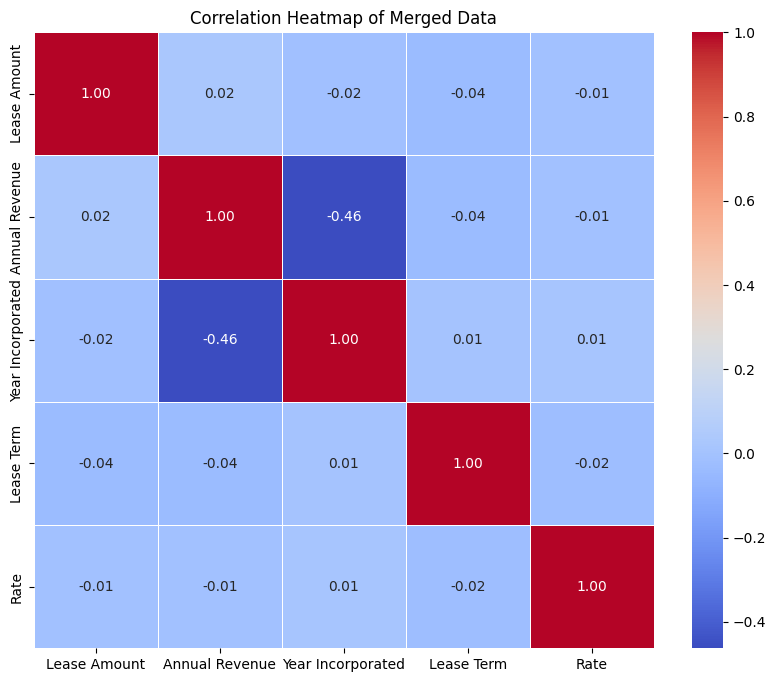

In [21]:
# Calculate the correlation matrix for the merged dataset (only numerical columns)
corr_matrix = merged_df[['Lease Amount', 'Annual Revenue', 'Year Incorporated', 'Lease Term', 'Rate']].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap of the correlation matrix using seaborn
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)

# Add title and display the plot
plt.title('Correlation Heatmap of Merged Data')
plt.show()

In [22]:
# Using Z-Score to detect outliers in numerical data
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
merged_df['zscore_annual_revenue'] = zscore(merged_df['Annual Revenue'])
merged_df['zscore_lease_amount'] = zscore(merged_df['Lease Amount'])

# Identify rows where Z-scores are above a certain threshold (e.g., 3 standard deviations)
outliers = merged_df[(merged_df['zscore_annual_revenue'].abs() > 3) | (merged_df['zscore_lease_amount'].abs() > 3)]
outliers

,Funder ID,Status,Company Location,Company Size,Annual Revenue,Year Incorporated,Industry Sector,Lease Term,Lease Amount,Equipment Type,Business Type,Previous Lease History,Application Date,Rate,zscore_annual_revenue,zscore_lease_amount
96,1,approved,NB,100+,29091055,2012,Landscaping & Agriculture,1,79549.112382,Heavy Machinery,Corporation,Yes,2018-06-18,1.50,3.063209,-0.935343
97,3,approved,NB,100+,29091055,2012,Landscaping & Agriculture,1,79549.112382,Heavy Machinery,Corporation,Yes,2018-06-18,1.50,3.063209,-0.935343
98,4,denied,NB,100+,29091055,2012,Landscaping & Agriculture,1,79549.112382,Heavy Machinery,Corporation,Yes,2018-06-18,1.50,3.063209,-0.935343
182,1,approved,NS,100+,43606847,1963,Service Industry,5,134385.893431,Service Machinery,Corporation,Yes,2017-08-18,1.00,4.960842,0.186898
183,3,approved,NS,100+,43606847,1963,Service Industry,5,134385.893431,Service Machinery,Corporation,Yes,2017-08-18,1.00,4.960842,0.186898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6847,4,approved,NB,100+,41427903,1965,Landscaping & Agriculture,4,79206.504518,Landscaping Tools,Corporation,Yes,2017-04-20,0.75,4.675991,-0.942354
6849,2,approved,NB,100+,47029708,2003,Construction & Transportation,5,70826.019915,Software,Corporation,No,2018-06-28,1.50,5.408309,-1.113862
6964,1,approved,PEI,100+,40973812,1961,Landscaping & Agriculture,4,157036.433480,Heavy Machinery,Corporation,No,2020-05-06,0.50,4.616629,0.650444
6965,3,approved,PEI,100+,40973812,1961,Landscaping & Agriculture,4,157036.433480,Heavy Machinery,Corporation,No,2020-05-06,0.50,4.616629,0.650444


#### Summary of Findings
- The heatmap reveals that none of the variables are strongly correlated with each other, with most correlation coefficients hovering around zero. This indicates that there are no obvious linear relationships between key variables such as Lease Amount, Annual Revenue, Year Incorporated, Lease Term, and Rate in the dataset.
- The weak correlations suggest that other factors, perhaps non-linear relationships or external variables not included in this dataset, may be influencing lease decisions and outcomes.
- The z-score analysis identified 195 outliers in the dataset, which could skew the results of the analysis if not addressed.

## Data Preparation

### Reload Data Sets

Reload Data Sets to remove any changes made to the data sets in doing the analysis

In [23]:
funding_results_for_modelling = pd.read_csv('data/funding_results.csv', parse_dates=['Application Date'])
rates_for_modelling = pd.read_csv('data/rates.csv', parse_dates=['Date'])

### Cleaning Data

Drop columns that are not needed for the model, remove null values and outliers, and create new features.

In [24]:

from datetime import datetime
#Clean Funding Results Data

# Calculate 'Years in Business' by subtracting 'Year Incorporated' from the current year
current_year = datetime.now().year
funding_results_for_modelling['Years in Business'] = current_year - funding_results_for_modelling['Year Incorporated']

#Map the 'Status' column to 1 and 0
funding_results_for_modelling['Encoded Status'] = funding_results_for_modelling['Status'].map({'approved': 1, 'denied': 0})

#Drop unnecessary columns
#Equipment Type: Dropped because almost 50% were empty 
#Business Type: Dropped becaue all were the same type
#Year Incorporated: Dropped because it is highly correlated with Years in Business
#Status: Replaced with Encoded Status
funding_results_for_modelling_reduced_columns = funding_results_for_modelling.drop(columns=['Equipment Type', 'Business Type', 'Year Incorporated', 'Status'])
cleaned_funding_results=funding_results_for_modelling_reduced_columns.dropna()



#Clean Rates Data
#Convert 'Rate' column in rates data to float, coerce errors to NaN, then drop rows where 'Rate' is not valid
rates_for_modelling['Rate'] = pd.to_numeric(rates_for_modelling['Rate'], errors='coerce')
cleaned_rates=rates_for_modelling.dropna(subset=['Rate'])





### Merge Data

Combining the two data sets on the 'Application Date' and 'Date' columns

In [25]:
# Using a left join to ensure we keep all the funding data even if there's no matching rate
merged_df_for_modelling = pd.merge(cleaned_funding_results, cleaned_rates, left_on='Application Date', right_on='Date', how='left')

# Drop the redundant 'Date' column from rates after the merge
cleaned_merged_df=merged_df_for_modelling.drop(columns=['Date'])

cleaned_merged_df.head()

,Funder ID,Company Location,Company Size,Annual Revenue,Industry Sector,Lease Term,Lease Amount,Previous Lease History,Application Date,Years in Business,Encoded Status,Rate
0,1,NB,51-100,5528010,Industrial & Material Handling,5,28173.881010,No,2020-09-04,32,1,0.5
1,3,NB,51-100,5528010,Industrial & Material Handling,5,28173.881010,No,2020-09-04,32,1,0.5
2,4,NB,51-100,5528010,Industrial & Material Handling,5,28173.881010,No,2020-09-04,32,1,0.5
3,1,NB,51-100,8407005,Industrial & Material Handling,1,161304.880881,No,2020-02-14,30,1,2.0
4,3,NB,51-100,8407005,Industrial & Material Handling,1,161304.880881,No,2020-02-14,30,1,2.0


### Split the data into training and testing sets

In [26]:
from sklearn.model_selection import train_test_split

# Define the features (X) and target (y)
X = cleaned_merged_df.drop(columns=['Encoded Status'])  # Features
y = cleaned_merged_df['Encoded Status']                 # Target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=44)

### Preprocessing Data

In [27]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from imblearn.over_sampling import SMOTE

# Define columns for transformations
numerical_features = ['Lease Amount', 'Annual Revenue', 'Years in Business', 'Lease Term', 'Rate']
categorical_features = ['Funder ID', 'Industry Sector', 'Company Location','Previous Lease History']
ordinal_features = ['Company Size']

# Define Preprocessing Steps

# For numerical features, we'll apply StandardScaler
numerical_transformer = StandardScaler()

# For categorical features, we'll apply OneHotEncoder
categorical_transformer = OneHotEncoder(drop='first', handle_unknown='ignore')

# For ordinal features, we'll apply OrdinalEncoder
# Define the categories for the ordinal features in the desired order
ordinal_categories = [
    ['1-50', '51-100','100+'] # Categories for 'Company Size'
]
ordinal_transformer = OrdinalEncoder(categories=ordinal_categories)


# Step 4: Create ColumnTransformer to apply transformations to specific columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)




In [43]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder



# Create the full pipeline with preprocessing and model placeholder
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('model', KNeighborsClassifier())])

# Set up the parameter grid for each model
param_grid = [
    {
        'model': [KNeighborsClassifier()],
        'model__n_neighbors': [3, 5, 7],  # Hyperparameters for KNN
        'model__weights': ['uniform', 'distance']
    },
    {
        'model': [DecisionTreeClassifier()],
        'model__max_depth': [None, 10, 20, 30],  # Hyperparameters for Decision Tree
        'model__min_samples_split': [2, 10, 20]
    },
    {
        'model': [SVC()],
        'model__kernel': ['linear', 'rbf'],  # Hyperparameters for SVC
        'model__C': [0.1, 1, 10]
    },
    {
        'model': [LogisticRegression()],
        'model__C': [0.1, 1, 10],  # Hyperparameters for Logistic Regression
        'model__solver': ['liblinear']
    }
]


# Use GridSearchCV to search for the best model and hyperparameters(F1 Score)
#added n_jobs=-1 to use all the cores on my computer
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1) 

# Fit the grid search
grid_search.fit(X_train, y_train)

# Print the best model and best parameters
print(f"Best Model: {grid_search.best_estimator_}")
print(f"Best Parameters: {grid_search.best_params_}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
test_accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy of the best model: {test_accuracy}")

Best Model: Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Lease Amount',
                                                   'Annual Revenue',
                                                   'Years in Business',
                                                   'Lease Term', 'Rate']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['Funder ID',
                                                   'Industry Sector',
                                                   'Company Location',
                                                   'Previous Lease History']),
                                                 ('ord',
                               

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from utils.data_modelling_helpers import ModelWrapper
knn_param_grid={
    'model__n_neighbors': [3, 5, 7, 9, 11, 13, 15],  # Hyperparameters for KNN
    'model__weights': ['uniform', 'distance']
}
knn_model=ModelWrapper(KNeighborsClassifier(), knn_param_grid, 'KNN')

decision_tree_param_grid={
    'model__max_depth': [None, 10, 20, 30],  # Hyperparameters for Decision Tree
    'model__min_samples_split': [2, 10, 20]
}
decision_tree_model=ModelWrapper(DecisionTreeClassifier(), decision_tree_param_grid, 'Decision Tree')

svc_param_grid={
    'model__kernel': ['linear', 'rbf'],  # Hyperparameters for SVC
    'model__C': [0.1, 1, 10]
}
svc_model=ModelWrapper(SVC(), svc_param_grid, 'SVC')

logistic_regression_param_grid={
    'model__C': [0.1, 1, 10],  # Hyperparameters for Logistic Regression
    'model__solver': ['liblinear']
}
logistic_regression_model=ModelWrapper(LogisticRegression(), logistic_regression_param_grid, 'Logistic Regression')

random_forest_param_grid={
    'model__n_estimators': [100, 200, 300, 400, 500],  # Hyperparameters for Random Forest
    'model__max_depth': [None, 10, 20, 30, 40, 50]
}
random_forest_model=ModelWrapper(RandomForestClassifier(class_weight='balanced'), random_forest_param_grid, 'Random Forest')

model_list=[knn_model,
            decision_tree_model,
            svc_model,
            logistic_regression_model,
            random_forest_model]

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor), 
    # ('under_sampler', RandomUnderSampler()),
    ('smote', SMOTE()),
    ('poly', PolynomialFeatures(degree=3)),
    ('model', LogisticRegression())
])

In [49]:
from utils.data_modelling_helpers import train_modelsx

best_models = train_modelsx(model_list, preprocessor, X_train, y_train, cv=5, scoring='f1')

[<utils.data_modelling_helpers.ModelWrapper object at 0x28aacca50>, <utils.data_modelling_helpers.ModelWrapper object at 0x28aacced0>, <utils.data_modelling_helpers.ModelWrapper object at 0x157abba50>, <utils.data_modelling_helpers.ModelWrapper object at 0x28ab730d0>, <utils.data_modelling_helpers.ModelWrapper object at 0x157a6d950>]
KNN
Decision Tree
SVC
Logistic Regression
Random Forest



All Model Evaluation Results:
+---------------------+------------+-------------+----------+------------+---------------------------------------------------------+
| Model               |   Accuracy |   Precision |   Recall |   F1 Score | Best Parameters                                         |
+=====================+============+=============+==========+============+=========================================================+
| KNN                 |     0.7959 |      0.8845 |   0.7959 |     0.8311 | {'model__n_neighbors': 3, 'model__weights': 'uniform'}  |
+---------------------+------------+-------------+----------+------------+---------------------------------------------------------+
| Decision Tree       |     0.8318 |      0.8859 |   0.8318 |     0.8544 | {'model__max_depth': 10, 'model__min_samples_split': 2} |
+---------------------+------------+-------------+----------+------------+---------------------------------------------------------+
| SVC                 |     0.8684 |  

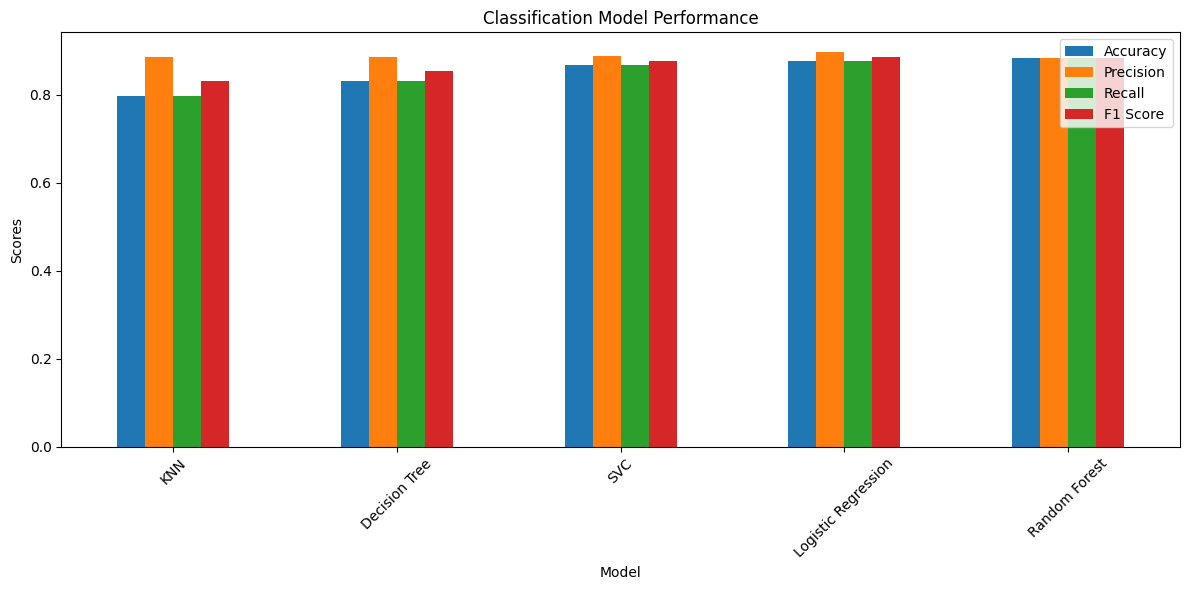


Model Hyperparameters:
1. KNN: model__n_neighbors=3, model__weights=uniform
2. Decision Tree: model__max_depth=10, model__min_samples_split=2
3. SVC: model__C=10, model__kernel=linear
4. Logistic Regression: model__C=10, model__solver=liblinear
5. Random Forest: model__max_depth=40, model__n_estimators=500


In [50]:
from utils.data_modelling_helpers import evaluate_models


evaluate_models(best_models, X_test, y_test, model_type='classification')

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
# X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
X_train

,Funder ID,Company Location,Company Size,Annual Revenue,Industry Sector,Lease Term,Lease Amount,Previous Lease History,Application Date,Years in Business,Rate
2080,3,NS,1-50,4630799,Landscaping & Agriculture,1,72346.240461,No,2016-03-11,11,0.75
2220,3,NS,1-50,4683312,Healthcare & Wellness,3,222314.690920,No,2023-09-15,32,5.25
5188,2,PEI,1-50,4620947,Healthcare & Wellness,2,169982.878395,Yes,2015-02-05,19,1.00
4549,2,PEI,1-50,3779015,Industrial & Material Handling,1,127916.138458,No,2018-11-07,2,2.00
3322,1,NS,1-50,4688528,Landscaping & Agriculture,4,110365.625842,Yes,2018-08-16,21,1.75
...,...,...,...,...,...,...,...,...,...,...,...
571,2,NS,100+,16674321,Industrial & Material Handling,2,146500.546670,No,2022-02-18,13,0.50
1197,3,NS,1-50,2638071,Industrial & Material Handling,1,173021.261676,Yes,2024-01-26,2,5.25
2801,1,NS,51-100,7948060,Healthcare & Wellness,5,134998.862616,No,2018-04-26,28,1.50
3491,4,NB,1-50,2045040,Service Industry,3,154067.647327,No,2015-11-13,4,0.75


In [33]:
new_best_models = train_modelsx(X_resampled, y_resampled, pipeline, param_grid, cv=5, scoring='f1')

NameError: name 'X_resampled' is not defined

In [ ]:
from utils.data_modelling_helpers import train_models


best_models=train_models(X_train, y_train, pipeline, param_grid, cv=5, scoring='f1')



      Funder ID Company Location Company Size  Annual Revenue  \
2080          3               NS         1-50         4630799   
2220          3               NS         1-50         4683312   
5188          2              PEI         1-50         4620947   
4549          2              PEI         1-50         3779015   
3322          1               NS         1-50         4688528   
...         ...              ...          ...             ...   
571           2               NS         100+        16674321   
1197          3               NS         1-50         2638071   
2801          1               NS       51-100         7948060   
3491          4               NB         1-50         2045040   
5908          3               NS         100+        34230836   

                     Industry Sector  Lease Term   Lease Amount  \
2080       Landscaping & Agriculture           1   72346.240461   
2220           Healthcare & Wellness           3  222314.690920   
5188           Hea

AttributeError: 'str' object has no attribute 'estimator'

In [ ]:
best_models

[{'Model Name': 'KNeighborsClassifier',
  'Best Parameters': {'model': KNeighborsClassifier(),
   'model__n_neighbors': 3,
   'model__weights': 'uniform'},
  'Best Pipeline': Pipeline(steps=[('preprocessor',
                   ColumnTransformer(transformers=[('num', StandardScaler(),
                                                    ['Lease Amount',
                                                     'Annual Revenue',
                                                     'Years in Business',
                                                     'Lease Term', 'Rate']),
                                                   ('cat',
                                                    OneHotEncoder(drop='first',
                                                                  handle_unknown='ignore'),
                                                    ['Funder ID',
                                                     'Industry Sector',
                                                     'C


All Model Evaluation Results:
+------------------------+------------+-------------+----------+------------+---------------------------------------------------------------------------------------------------------+
| Model                  |   Accuracy |   Precision |   Recall |   F1 Score | Best Parameters                                                                                         |
+========================+============+=============+==========+============+=========================================================================================================+
| KNeighborsClassifier   |     0.9148 |      0.8382 |   0.9148 |     0.8748 | {'model': KNeighborsClassifier(), 'model__n_neighbors': 3, 'model__weights': 'uniform'}                 |
+------------------------+------------+-------------+----------+------------+---------------------------------------------------------------------------------------------------------+
| KNeighborsClassifier   |     0.9148 |      0.83

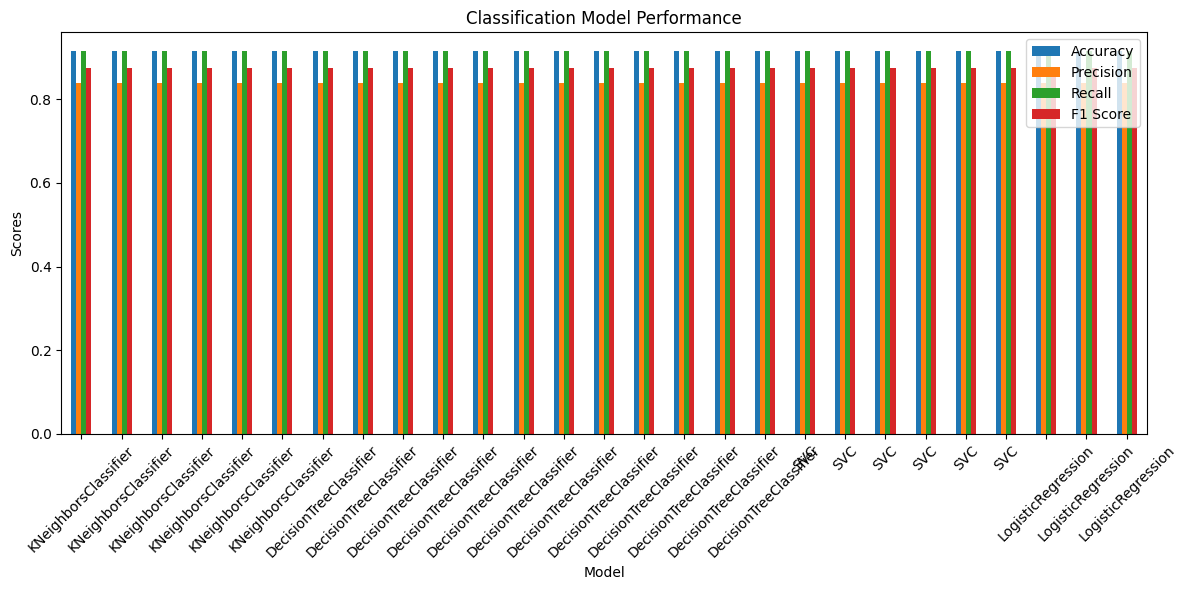


Model Hyperparameters:
1. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=3, model__weights=uniform
2. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=3, model__weights=distance
3. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=5, model__weights=uniform
4. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=5, model__weights=distance
5. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=7, model__weights=uniform
6. KNeighborsClassifier: model=KNeighborsClassifier(), model__n_neighbors=7, model__weights=distance
7. DecisionTreeClassifier: model=DecisionTreeClassifier(), model__max_depth=None, model__min_samples_split=2
8. DecisionTreeClassifier: model=DecisionTreeClassifier(), model__max_depth=None, model__min_samples_split=10
9. DecisionTreeClassifier: model=DecisionTreeClassifier(), model__max_depth=None, model__min_samples_split=20
10. DecisionTreeClassifier: model=DecisionTr

In [ ]:
from utils.data_modelling_helpers import evaluate_models
evaluate_models(best_models, X_test, y_test, model_type='classification')